In [72]:
'''
1. 데이터 준비

2. 데이터 전처리

3. 모델 구성

4.정확도 평가

5. 예측 만들기

'''



'\n1. 데이터 준비\n\n2. 데이터 전처리\n\n3. 모델 구성\n\n4.정확도 평가\n\n5. 예측 만들기\n\n'

In [73]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [74]:
print(tf.__version__)

2.3.0


##  텐서플로우는 로우레벨
- 케라스와 함꼐 사용한다.
- 유저 코드 -> 케라스 -> 텐서플로우의 순으로 실행

# 1. 데이터 준비

In [75]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#투레인, 테스트 셋은 튜플로 받는다.

In [76]:
train_images.shape

(60000, 28, 28)

In [77]:
test_images.shape

(10000, 28, 28)

In [78]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [79]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2. 데이터 전처리

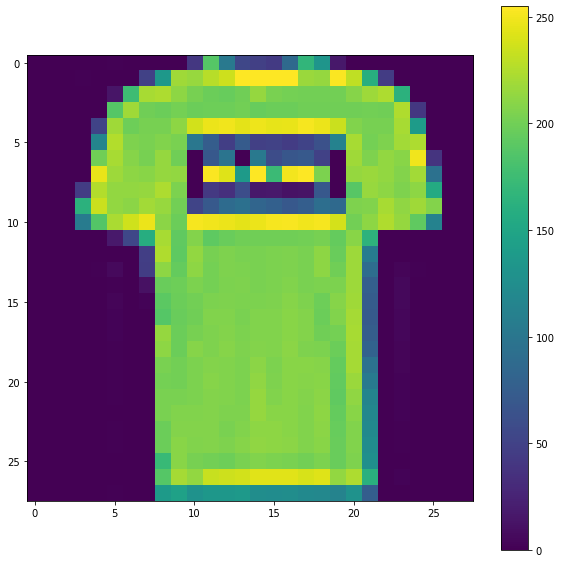

In [80]:
plt.figure(figsize=(10,10))
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

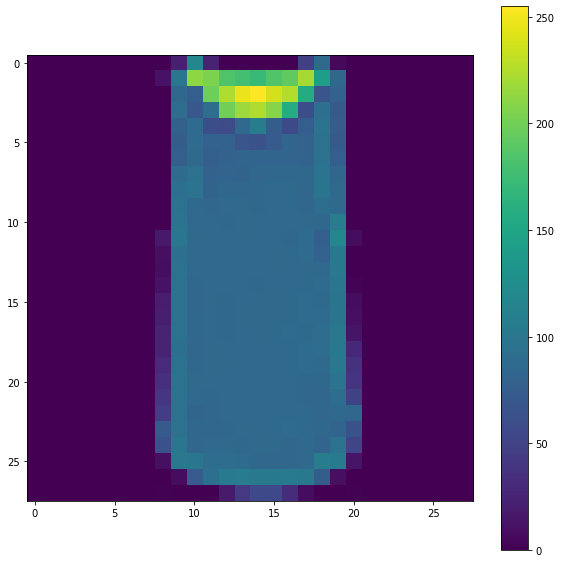

In [81]:
plt.figure(figsize=(10,10))
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

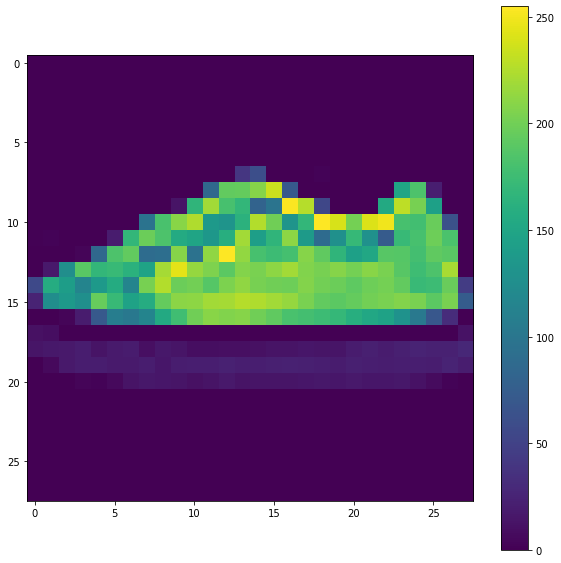

In [82]:
plt.figure(figsize=(10,10))
plt.imshow(train_images[158])
plt.colorbar()
plt.grid(False)
plt.show()

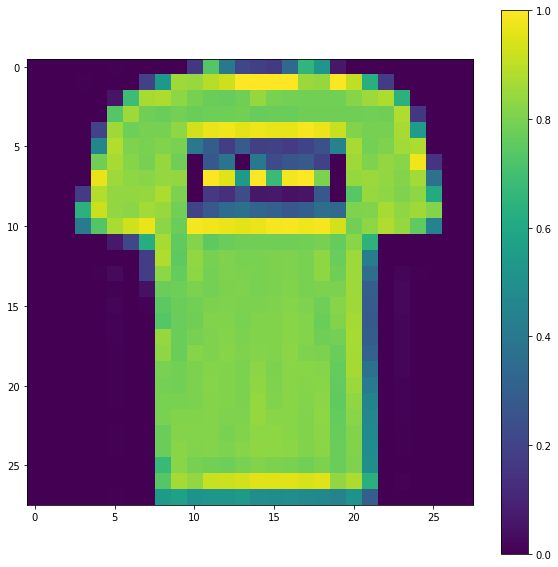

In [83]:
train_images = train_images / 255.0
test_images = test_images / 255.0
plt.figure(figsize=(10,10))
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

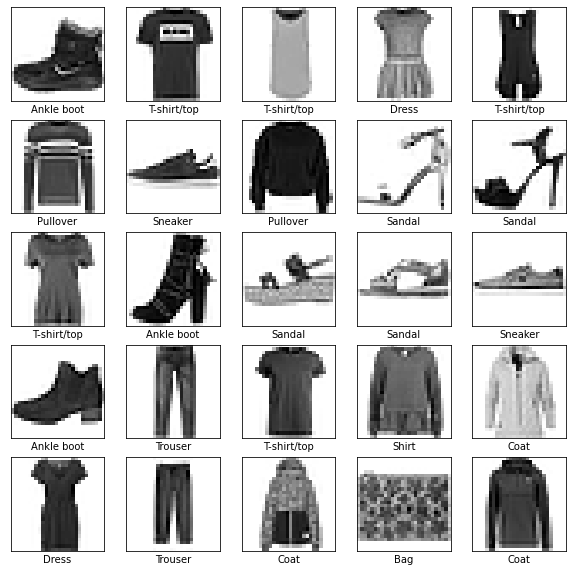

In [84]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 3. 모델 구성

In [85]:
model = keras.Sequential([
    #2차원배열(28x28 픽셀)의 이미지 포맷을 28*28=784 픽셀의 1차원 배열로 변환
keras.layers.Flatten(input_shape=(28,28)),
    #128개의 노드(뉴런)
    keras.layers.Dense(128, activation=tf.nn.relu),
    #10개의 노드의 소프트맥스층 (10개의 확률을 반환하고 반환된 값은 전체 합의 1이됨)
    #각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력
keras.layers.Dense(10, activation=tf.nn.softmax)
])  

In [86]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [87]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 669us/step - loss: 0.4986 - accuracy: 0.8248
Epoch 2/5
1875/1875 [==============================] - 1s 630us/step - loss: 0.3722 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 1s 642us/step - loss: 0.3363 - accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 1s 640us/step - loss: 0.3120 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 1s 637us/step - loss: 0.2916 - accuracy: 0.8929


# 4. 정확도 평가

In [88]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 494us/step - loss: 0.3433 - accuracy: 0.8780


# 5. 예측 만들기

## 훈련된 모델을 사용하여 실제 모델이 어떻게 예측하는지 test_images로 확인


In [89]:
predictions = model.predict(test_images)


In [90]:
predictions[0]


array([1.5518119e-04, 1.0213120e-08, 1.8468783e-07, 1.3251437e-07,
       2.1261839e-07, 8.8212555e-03, 2.8701474e-05, 3.0107703e-02,
       9.3546169e-06, 9.6087724e-01], dtype=float32)

In [91]:
np.argmax(predictions[0])


9

In [92]:
test_labels[0]

9

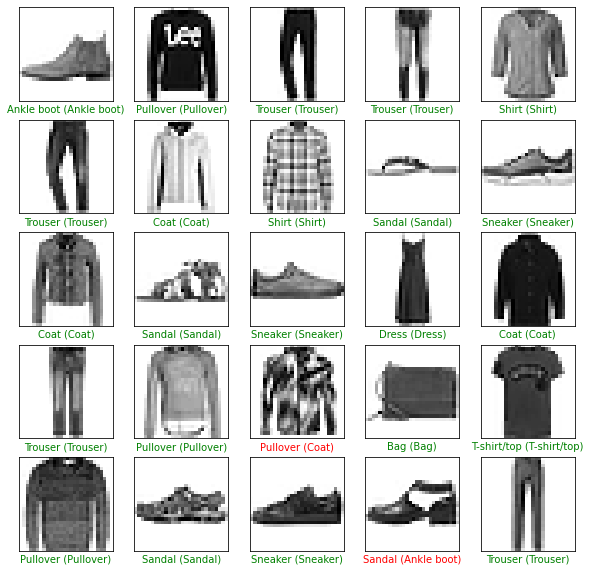

In [93]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    # predictions에서 가장 큰 값을 predicted_label 로 가져온다.
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    # 이때 실제 test_label과 일치하면 초록색 글씨로,
    if predicted_label == true_label:
      color = 'green'
    # 일치하지 않으면 빨간색 글씨로 출력한다.
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],
class_names[true_label]),
                                  color=color)

In [45]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)


In [40]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

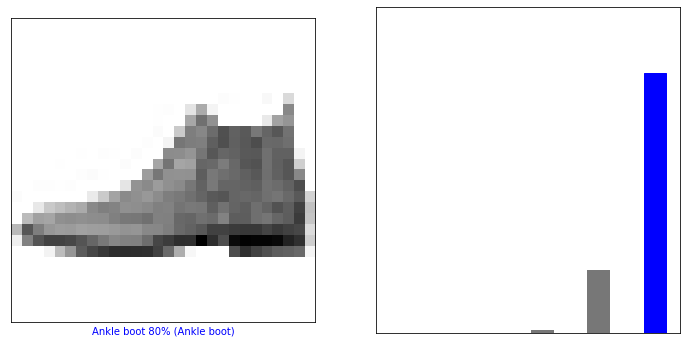

In [66]:
i = 0
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

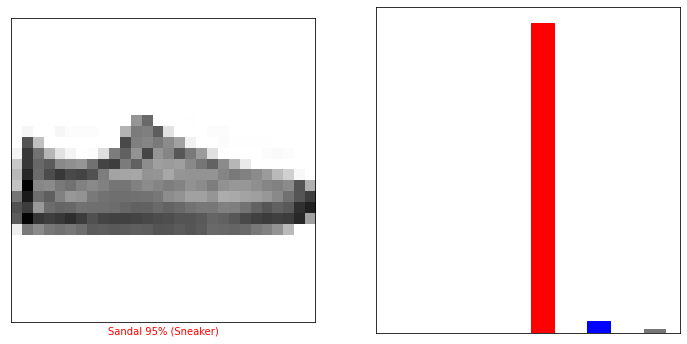

In [67]:
i = 12
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

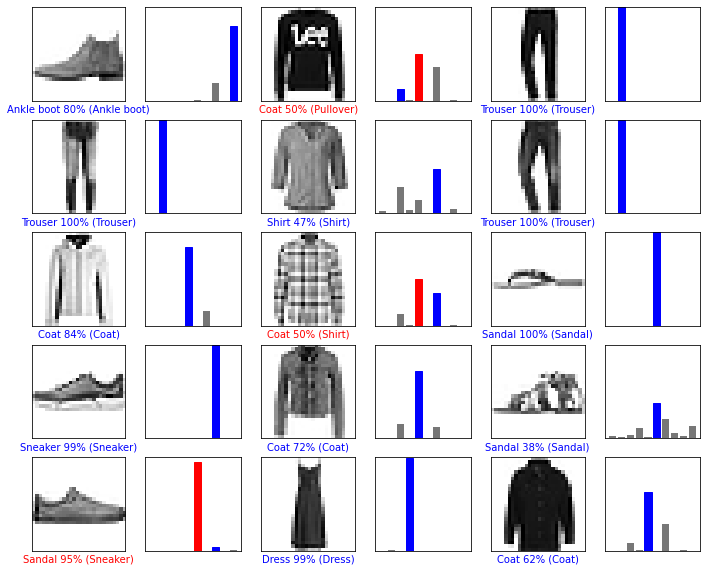

In [71]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냄
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [60]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]
print(img.shape)




(28, 28)


In [61]:
# 이미지 하나만 사용할 때도 배치에 추가
img = (np.expand_dims(img,0))
print(img.shape)



(1, 28, 28)


In [62]:
predictions_single = model.predict(img)
print(predictions_single)

[[5.4881535e-09 9.5510799e-08 2.4044741e-10 4.6179997e-07 8.9595699e-11
  1.0419754e-02 2.7574611e-08 1.9261442e-01 4.2554280e-09 7.9696524e-01]]


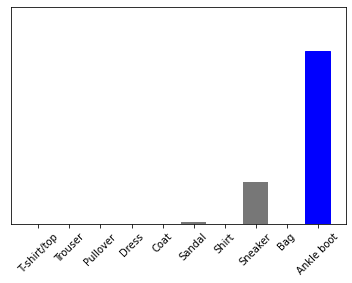

In [63]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [64]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
